### Import Libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load the dataset

In [150]:
bb = pd.read_csv('breaking_bad_imdb.csv')
bb.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,2008-01-20,9.1,30419,"Diagnosed with terminal lung cancer, chemistry..."
1,1,2,Cat's in the Bag...,2008-01-27,8.7,22282,After their first drug deal goes terribly wron...
2,1,3,...And the Bag's in the River,2008-02-10,8.8,21633,Walt and Jesse clean up after the bathtub inci...
3,1,4,Cancer Man,2008-02-17,8.3,20912,Walt tells the rest of his family about his ca...
4,1,5,Gray Matter,2008-02-24,8.4,20546,Walt rejects everyone who tries to help him wi...


### Process the Dataset

In [151]:
# Capitalize column names
bb.columns = bb.columns.str.title()
# Rename few columns
bb = bb.rename(columns={'Episode_Num' : 'Episode', 'Imdb Rating': 'IMDB Rating'})
# Drop Description Variable
bb = bb.drop(columns = 'Desc', axis=1)
# Print
bb.head()

,Season,Episode,Title,Original_Air_Date,Imdb_Rating,Total_Votes
0,1,1,Pilot,2008-01-20,9.1,30419
1,1,2,Cat's in the Bag...,2008-01-27,8.7,22282
2,1,3,...And the Bag's in the River,2008-02-10,8.8,21633
3,1,4,Cancer Man,2008-02-17,8.3,20912
4,1,5,Gray Matter,2008-02-24,8.4,20546


In [152]:
# Add column for overall episode count (season is not accounted for)
bb['Overall_Episode'] = range(1,63)
# Rearrange order of the columns
bb = bb[['Season', 'Episode', 'Overall_Episode','Title', 'Original_Air_Date', 'Imdb_Rating',
       'Total_Votes']]
bb.head()

,Season,Episode,Overall_Episode,Title,Original_Air_Date,Imdb_Rating,Total_Votes
0,1,1,1,Pilot,2008-01-20,9.1,30419
1,1,2,2,Cat's in the Bag...,2008-01-27,8.7,22282
2,1,3,3,...And the Bag's in the River,2008-02-10,8.8,21633
3,1,4,4,Cancer Man,2008-02-17,8.3,20912
4,1,5,5,Gray Matter,2008-02-24,8.4,20546


In [153]:
# General information on the variables
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Season             62 non-null     int64  
 1   Episode            62 non-null     int64  
 2   Overall_Episode    62 non-null     int64  
 3   Title              62 non-null     object 
 4   Original_Air_Date  62 non-null     object 
 5   Imdb_Rating        62 non-null     float64
 6   Total_Votes        62 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 3.5+ KB


In [154]:
# Change bb['Original Air Data'] to a date type
bb['Original_Air_Date'] = pd.to_datetime(bb['Original_Air_Date'], format='%y-%m-%d', infer_datetime_format = True)
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Season             62 non-null     int64         
 1   Episode            62 non-null     int64         
 2   Overall_Episode    62 non-null     int64         
 3   Title              62 non-null     object        
 4   Original_Air_Date  62 non-null     datetime64[ns]
 5   Imdb_Rating        62 non-null     float64       
 6   Total_Votes        62 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 3.5+ KB


In [155]:
# Check for missing data
percent_missing = bb.isnull().sum() * 100 / len(bb)
missing_values_df = pd.DataFrame({'percent_missing': percent_missing}, index = bb.columns)

missing_values_df

,percent_missing
Season,0.0
Episode,0.0
Overall_Episode,0.0
Title,0.0
Original_Air_Date,0.0
Imdb_Rating,0.0
Total_Votes,0.0


### Comparing the Seasons Using IMDB Score

#### Groupby and Pivot Table

In [156]:
# Average IMDB score for each season's episodes
# Using Groupby
bb.groupby('Season')['Imdb_Rating'].mean()

Season
1    8.785714
2    8.861538
3    8.815385
4    9.038462
5    9.431250
Name: Imdb_Rating, dtype: float64

In [157]:
# Using a pivot table
pt = bb.pivot_table('Imdb_Rating', index = 'Season', aggfunc = np.mean)
pt

,Imdb_Rating
Season,
1,8.785714
2,8.861538
3,8.815385
4,9.038462
5,9.431250


#### Visualization

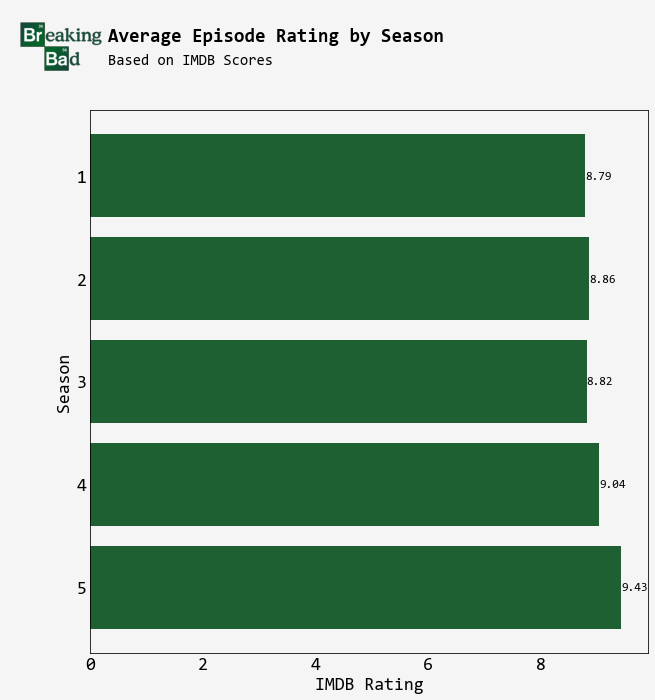

<Figure size 432x288 with 0 Axes>

In [166]:
# Graph
fig, ax = plt.subplots(figsize = (10,10))

# Colors, font, and fontsize 
text_c = 'black'
markers_c = ''
plt.rcParams['font.family'] = 'Consolas'
plt.rcParams.update({'font.size': 12})

# Background
background='whitesmoke'
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

# Remove the ticks
ax.tick_params(axis='both', length=0, colors=text_c)

# Set axis labels
ax.set_ylabel('Season', color = 'black')
ax.set_xlabel('IMDB Rating', color = 'black')

# Values
x = pt.index
y = pt['Imdb_Rating']
barh = ax.barh(y = x, width = y, color = '#1F6032')
ax.invert_yaxis() # For ascending order

# Bar label
ax.bar_label(barh, color = text_c, fmt='%.2f')

# Title
fig.text(x=0.15, y=.975,s='Average Episode Rating by Season', fontsize = 19, color = text_c, fontweight = 'bold')
fig.text(x=0.15, y=.943,s='Based on IMDB Scores', color = text_c, fontsize = 15,fontweight = 'regular')

# Breaking Bad logo 
import matplotlib.image as image

logo = fig.add_axes([.01,.89,.15,.155])
logo.axis('off')
img =image.imread('bb logo.png')
logo.imshow(img)


plt.show()

# Save
plt.savefig(fname = 'Breaking Bad Average IMDB Rating for Episodes by Season', dpi=400, format='png')

### IMDB Rating Trend (Visualization)

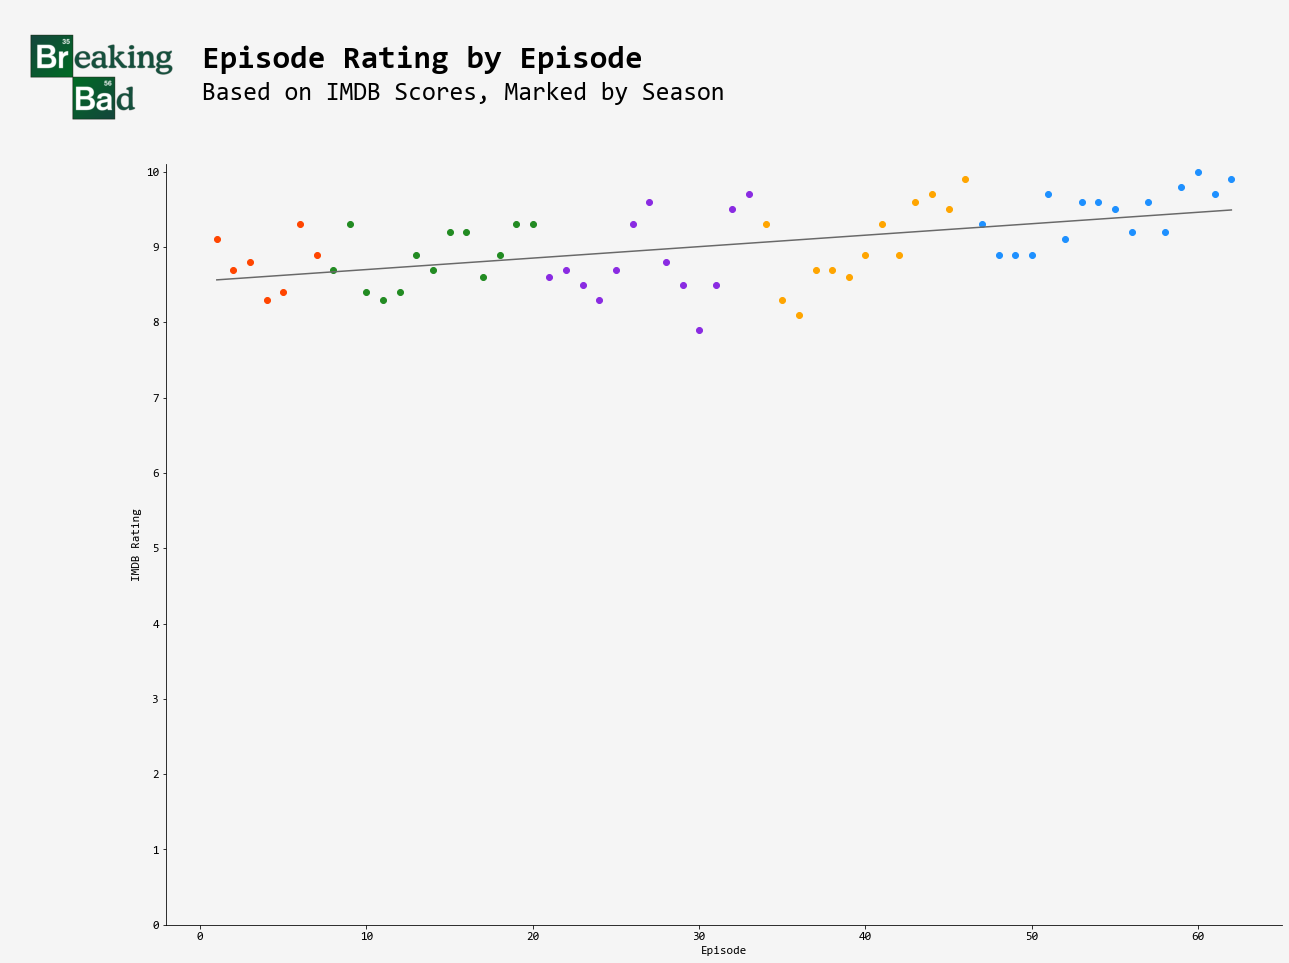

<Figure size 432x288 with 0 Axes>

In [167]:
# Graph
fig, ax = plt.subplots(figsize = (20,14))

# Colors, font, and fontsize 
text_c = 'black'
markers_c = ''
plt.rcParams['font.family'] = 'Consolas'
plt.rcParams.update({'font.size': 18})

# Background
background='whitesmoke'
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis labels
ax.set_xlabel('Episode', color = 'black')
ax.set_ylabel('IMDB Rating', color = 'black')

# Plot values
x = bb['Overall_Episode']
y = bb['Imdb_Rating']
plt1 = ax.scatter(x[:7], y[:7], zorder=2, color = 'orangered')
plt2 = ax.scatter(x[7:20], y[7:20], zorder=2, color = 'forestgreen')
plt3 = ax.scatter(x[20:33], y[20:33], zorder=2, color = 'blueviolet')
plt4 = ax.scatter(x[33:46], y[33:46], zorder=2, color = 'orange')
plt5 = ax.scatter(x[46:62], y[46:62], zorder=2, color = 'dodgerblue')

# Fit a line through the entirety of the values
from numpy.polynomial.polynomial import polyfit
m, b = np.polyfit(x, y,deg=1)
plt.plot(x, m*x+b, color = 'dimgrey')

# Set yticks
plt.yticks(np.arange(0, 11, step=1)) # Important to accurately depict the variation of the grades, which are not that high
# unless they are only from 7.8 to 10, which are the lowest and highest score respectively

# Title
fig.text(x=0.15, y=.975,s='Episode Rating by Episode', fontsize = 32, color = text_c, fontweight = 'bold')
fig.text(x=0.15, y=.943,s='Based on IMDB Scores, Marked by Season', color = text_c, fontsize = 25,fontweight = 'regular')

# Breaking Bad logo 
import matplotlib.image as image

logo = fig.add_axes([.01,.8955,.14,.14])
logo.axis('off')
img =image.imread('bb logo.png')
logo.imshow(img)

plt.show()

# Save
plt.savefig(fname = 'Breaking Bad IMDB Rating Trendline by Episode', dpi=400, format='png')